In [26]:
!apt install python-sklearn  

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  blt fonts-lyx javascript-common libglade2-0 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libjs-jquery libjs-jquery-ui libpython-dev libpython2.7
  libpython2.7-dev libtcl8.6 libtk8.6 libwebpmux1 libxss1 python-cairo
  python-cycler python-dateutil python-decorator python-dev python-glade2
  python-gobject-2 python-gtk2 python-imaging python-joblib python-matplotlib
  python-matplotlib-data python-nose python-numpy python-pil
  python-pkg-resources python-pyparsing python-scipy python-simplejson
  python-six python-sklearn-lib python-tk python-tz python2.7-dev tk8.6-blt2.5
  ttf-bitstream-vera tzdata
Suggested packages:
  blt-demo apache2 | lighttpd | httpd gvfs libjs-jquery-ui-docs tcl8.6 tk8.6
  python-gtk2-doc python-gobject-2-dbg dvipng inkscape ipython
  python-cairocffi python-configobj python-excelerator python-gobject
  python-mat

In [3]:
# import the necessary packages
from imutils import paths
import face_recognition
import argparse
import pickle
import cv2
import os
import dlib.cuda as cuda

cuda.set_device(0)

os.getcwd()

'/tf/HMRussia/Russia_Demo/age-gender-estimation/cluster'

In [5]:
dataset = '/tf/HMRussia/Russia_Demo/age-gender-estimation/InputFrames'
encodings = '/tf/HMRussia/Russia_Demo/age-gender-estimation/pickle/pickele_by_notebook.pickle'
detection_method = 'cnn'

In [7]:
print("[INFO] quantifying faces...")
imagePaths = list(paths.list_images(dataset))

imagePaths

[INFO] quantifying faces...


['/tf/HMRussia/Russia_Demo/age-gender-estimation/InputFrames/RU_2019-04-22_12_13_image3144.jpg',
 '/tf/HMRussia/Russia_Demo/age-gender-estimation/InputFrames/RU_2019-04-22_12_13_image3201.jpg',
 '/tf/HMRussia/Russia_Demo/age-gender-estimation/InputFrames/RU_2019-04-22_12_13_image3122.jpg',
 '/tf/HMRussia/Russia_Demo/age-gender-estimation/InputFrames/RU_2019-04-22_12_13_image3146.jpg',
 '/tf/HMRussia/Russia_Demo/age-gender-estimation/InputFrames/RU_2019-04-22_12_13_image3151.jpg',
 '/tf/HMRussia/Russia_Demo/age-gender-estimation/InputFrames/RU_2019-04-22_12_13_image3154.jpg',
 '/tf/HMRussia/Russia_Demo/age-gender-estimation/InputFrames/RU_2019-04-22_12_13_image3164.jpg',
 '/tf/HMRussia/Russia_Demo/age-gender-estimation/InputFrames/RU_2019-04-22_12_13_image3198.jpg',
 '/tf/HMRussia/Russia_Demo/age-gender-estimation/InputFrames/RU_2019-04-22_12_13_image3098.jpg',
 '/tf/HMRussia/Russia_Demo/age-gender-estimation/InputFrames/RU_2019-04-22_12_13_image3096.jpg',
 '/tf/HMRussia/Russia_Demo/age

In [9]:
data = []

# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
    # load the input image and convert it from RGB (OpenCV ordering)
    # to dlib ordering (RGB)
    print("[INFO] processing image {}/{}".format(i + 1,
        len(imagePaths)))
    print(imagePath)
    image = cv2.imread(imagePath)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# detect the (x, y)-coordinates of the bounding boxes
    # corresponding to each face in the input image
    boxes = face_recognition.face_locations(rgb,
        model=detection_method)

# compute the facial embedding for the face
    encodings = face_recognition.face_encodings(rgb, boxes)
 
    # build a dictionary of the image path, bounding box location,
    # and facial encodings for the current image
    d = [{"imagePath": imagePath, "loc": box, "encoding": enc}
        for (box, enc) in zip(boxes, encodings)]
    data.extend(d)

[INFO] processing image 1/153
/tf/HMRussia/Russia_Demo/age-gender-estimation/InputFrames/RU_2019-04-22_12_13_image3144.jpg
[INFO] processing image 2/153
/tf/HMRussia/Russia_Demo/age-gender-estimation/InputFrames/RU_2019-04-22_12_13_image3201.jpg
[INFO] processing image 3/153
/tf/HMRussia/Russia_Demo/age-gender-estimation/InputFrames/RU_2019-04-22_12_13_image3122.jpg
[INFO] processing image 4/153
/tf/HMRussia/Russia_Demo/age-gender-estimation/InputFrames/RU_2019-04-22_12_13_image3146.jpg
[INFO] processing image 5/153
/tf/HMRussia/Russia_Demo/age-gender-estimation/InputFrames/RU_2019-04-22_12_13_image3151.jpg
[INFO] processing image 6/153
/tf/HMRussia/Russia_Demo/age-gender-estimation/InputFrames/RU_2019-04-22_12_13_image3154.jpg
[INFO] processing image 7/153
/tf/HMRussia/Russia_Demo/age-gender-estimation/InputFrames/RU_2019-04-22_12_13_image3164.jpg
[INFO] processing image 8/153
/tf/HMRussia/Russia_Demo/age-gender-estimation/InputFrames/RU_2019-04-22_12_13_image3198.jpg
[INFO] processin

In [21]:
os.listdir()

['facenet_pipeline.ipynb',
 'encode_faces.py',
 '.ipynb_checkpoints',
 'cluster_faces.py']

In [24]:
# dump the facial encodings data to disk
f = open('test.pickle', "wb")
f.write(pickle.dumps(data))
f.close()

In [29]:
# import the necessary packages
from sklearn.cluster import DBSCAN
from imutils import build_montages
from PIL import Image
import numpy as np
import argparse
import pickle
import cv2
import os
import datetime 
import random
import string

In [35]:
# pickle_in = open("test.pickle","rb")
# example_dict = pickle.load(pickle_in)
# example_dict

[{'encoding': array([-1.38180971e-01,  1.19568966e-01,  7.58823752e-02, -1.04798093e-01,
         -8.42895955e-02, -7.30069280e-02, -1.78313181e-02, -8.61472040e-02,
          1.80181533e-01, -4.95206937e-02,  2.43252307e-01,  3.39753293e-02,
         -2.51182616e-01,  4.78934534e-02,  1.27129331e-02,  1.28408819e-01,
         -1.72977909e-01, -1.14136562e-01, -7.82532021e-02, -9.74449143e-03,
          7.36053735e-02,  1.10339411e-02,  2.38862671e-02,  1.20437458e-01,
         -1.32618949e-01, -2.53570974e-01, -9.35812891e-02, -1.53024271e-02,
          2.03521401e-02, -7.07325041e-02,  3.55483070e-02,  6.39776587e-02,
         -1.83818147e-01, -1.73498690e-03,  5.53088747e-02,  4.45050299e-02,
         -5.17801531e-02, -1.21420637e-01,  2.82620370e-01,  1.43127013e-02,
         -2.00850338e-01, -5.03006577e-03,  3.47802639e-02,  2.35366762e-01,
          1.57067239e-01,  3.54280323e-03,  4.04862985e-02, -9.52286422e-02,
          1.50363564e-01, -2.64779419e-01,  9.32769850e-02,  1.8

In [37]:
print("[INFO] loading encodings...")
pickle_in = open("test.pickle","rb")
data = pickle.load(pickle_in)
data = np.array(data)
encodings = [d["encoding"] for d in data]
encodings

[INFO] loading encodings...


[array([-1.38180971e-01,  1.19568966e-01,  7.58823752e-02, -1.04798093e-01,
        -8.42895955e-02, -7.30069280e-02, -1.78313181e-02, -8.61472040e-02,
         1.80181533e-01, -4.95206937e-02,  2.43252307e-01,  3.39753293e-02,
        -2.51182616e-01,  4.78934534e-02,  1.27129331e-02,  1.28408819e-01,
        -1.72977909e-01, -1.14136562e-01, -7.82532021e-02, -9.74449143e-03,
         7.36053735e-02,  1.10339411e-02,  2.38862671e-02,  1.20437458e-01,
        -1.32618949e-01, -2.53570974e-01, -9.35812891e-02, -1.53024271e-02,
         2.03521401e-02, -7.07325041e-02,  3.55483070e-02,  6.39776587e-02,
        -1.83818147e-01, -1.73498690e-03,  5.53088747e-02,  4.45050299e-02,
        -5.17801531e-02, -1.21420637e-01,  2.82620370e-01,  1.43127013e-02,
        -2.00850338e-01, -5.03006577e-03,  3.47802639e-02,  2.35366762e-01,
         1.57067239e-01,  3.54280323e-03,  4.04862985e-02, -9.52286422e-02,
         1.50363564e-01, -2.64779419e-01,  9.32769850e-02,  1.82133198e-01,
         7.9

In [45]:
# cluster the embeddings
print("[INFO] clustering...")
clt = DBSCAN(metric="euclidean")
clt.fit(encodings)       

[INFO] clustering...


DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    min_samples=5, p=None, random_state=None)

In [46]:
labelIDs = np.unique(clt.labels_)
numUniqueFaces = len(np.where(labelIDs > -1)[0])
print("[INFO] # unique faces: {}".format(numUniqueFaces))

[INFO] # unique faces: 2


[INFO] faces for face ID: -1
[INFO] faces for face ID: 0
[INFO] faces for face ID: 1


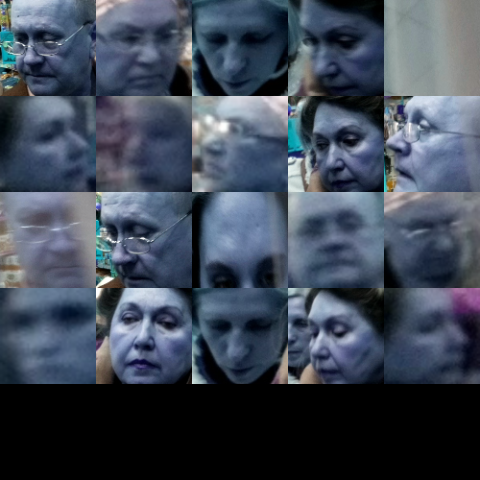

In [48]:
for labelID in labelIDs:
    try:
        
    # find all indexes into the `data` array that belong to the
    # current label ID, then randomly sample a maximum of 25 indexes
    # from the set
        print("[INFO] faces for face ID: {}".format(labelID))
        idxs = np.where(clt.labels_ == labelID)[0]
        idxs = np.random.choice(idxs, size=min(20, len(idxs)),
        replace=False)
 
    # initialize the list of faces to include in the montage
        faces = []

    # loop over the sampled indexes
        for i in idxs:
        # load the input image and extract the face ROI
                image = cv2.imread(data[i]["imagePath"])
                (top, right, bottom, left) = data[i]["loc"]
                face = image[top:bottom, left:right]
#                 cv2.imshow(str(labelID),face)
                cv2.waitKey(0)
                cv2.imwrite(os.path.join((os.getcwd()+"/images"),str(i))+'.jpg',face)

        # force resize the face ROI to 96x96 and then add it to the
        # faces montage list
                face = cv2.resize(face, (100,100))
                cv2.imwrite(str(i)+"_"+".jpg",face)
                faces.append(face)

# create a montage using 96x96 "tiles" with 5 rows and 5 columns
        montage = build_montages(faces, (96, 96), (5, 5))[0]
        img = Image.fromarray(montage)
        img.save(str(labelID)+'.png')
        
        # show the output montage
        title = "Face ID #{}".format(labelID)
        title = "Unknown Faces" if labelID == -1 else title
#         cv2.imshow(title, montage)
        cv2.imwrite(str(title)+".jpg",montage)
        cv2.waitKey(0)
        #os.chdir('../../')
    except StopIteration:
        raise
    except Exception as e:
        print(e)


from IPython.display import Image
Image(filename=str(labelID)+'.png')               